In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Originaldata=pd.read_csv("Loan Default II (Employed).csv")
Originaldata.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Loan Default II (Employed).csv'

In [159]:
Originaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [160]:
#Remove Index column
Originaldata=Originaldata.drop(columns= "Index")

#Change Employed and Defaulted columns to boolean
Originaldata['Employed'] = Originaldata['Employed'].astype('bool')
Originaldata['Defaulted?'] = Originaldata['Defaulted?'].astype('bool')

In [161]:
Originaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  bool   
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  bool   
dtypes: bool(2), float64(2)
memory usage: 175.9 KB


>**Exploratory Data Analysis**

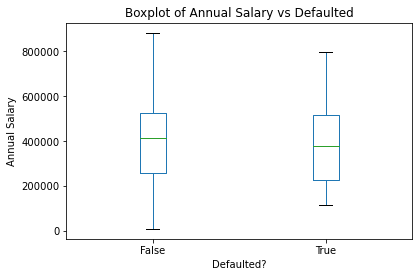

In [162]:
#boxplot using Pandas
Originaldata.boxplot(column='Annual Salary', by='Defaulted?', grid=False)

# Add labels and titles using matplotlib.pyplot library
plt.xlabel('Defaulted?')
plt.ylabel('Annual Salary')
plt.title('Boxplot of Annual Salary vs Defaulted')
plt.suptitle('')  # Removes the default 'Boxplot grouped by' title added by pandas

# Display the plot
plt.show()

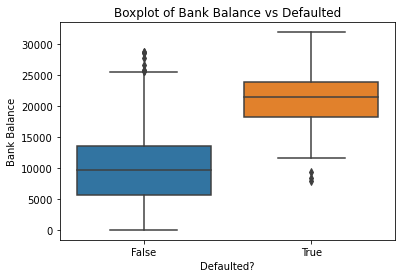

In [163]:
#boxplot using seaborn library
sb.boxplot(y=Originaldata['Bank Balance'], x=Originaldata['Defaulted?'])

# Add labels and titles using matplotlib.pyplot library
plt.xlabel('Defaulted?')
plt.ylabel('Bank Balance')
plt.title('Boxplot of Bank Balance vs Defaulted')
plt.suptitle('')  # Removes the default 'Boxplot grouped by' title added by pandas

# Display the plot
plt.show()

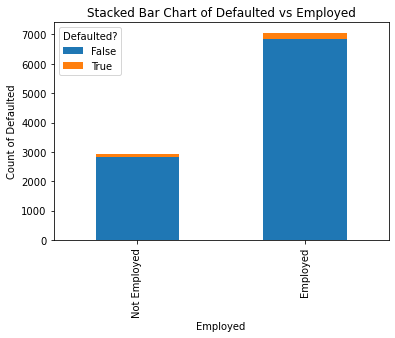

In [164]:
grouped = Originaldata.groupby(['Employed', 'Defaulted?']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Employed')
plt.ylabel('Count of Defaulted')
plt.title('Stacked Bar Chart of Defaulted vs Employed')
plt.xticks(ticks=[0, 1], labels=['Not Employed', 'Employed'])  # Adjust x-axis labels if necessary

# Display the plot
plt.show()

>**Model Development**

>**Prescriptive Model:** Decision Tree

In [165]:
#Splitting the dataset into train set and test set

from sklearn.model_selection import train_test_split as tts

X = Originaldata.drop(columns="Defaulted?")
Y = Originaldata["Defaulted?"]

X_train,X_test,Y_train,Y_test = tts(X,Y,random_state=288)

In [166]:
from sklearn import tree

model = tree.DecisionTreeClassifier(random_state=288)

model.fit(X_train,Y_train)
pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)

print(cm)

print("Accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[2342   66]
 [  62   30]]
Accuracy is  0.9488


Accuracy: 0.9488
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97      2408
        True       0.31      0.33      0.32        92

    accuracy                           0.95      2500
   macro avg       0.64      0.65      0.65      2500
weighted avg       0.95      0.95      0.95      2500

Confusion Matrix:
 [[2342   66]
 [  62   30]]


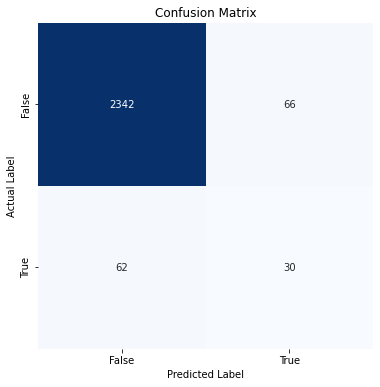

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

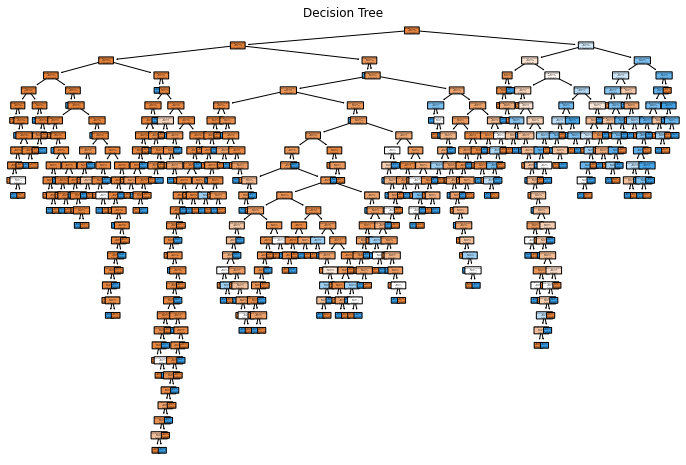

In [168]:
# 2. Visualizing the Decision Tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree")
plt.show()

**Limiting max depth to 7**

In [169]:
model2 = tree.DecisionTreeClassifier(random_state=288, max_depth=7)

model2.fit(X_train,Y_train)
pred_RF2 = model2.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_RF2)

print(cm)

print("Accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[2384   24]
 [  71   21]]
Accuracy is  0.962


Accuracy: 0.962
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98      2408
        True       0.47      0.23      0.31        92

    accuracy                           0.96      2500
   macro avg       0.72      0.61      0.64      2500
weighted avg       0.95      0.96      0.96      2500

Confusion Matrix:
 [[2384   24]
 [  71   21]]


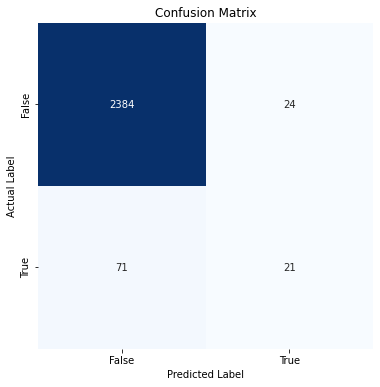

In [170]:
# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred_RF2)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred_RF2))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred_RF2)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

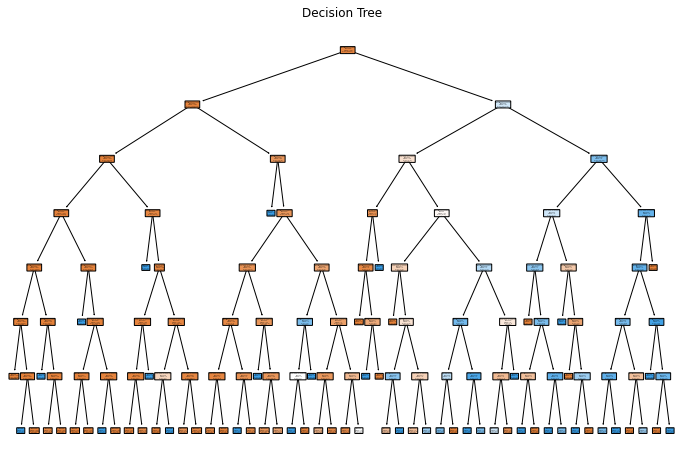

In [171]:
# 2. Visualizing the Decision Tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model2, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree")
plt.show()

In [172]:
# Get feature importances from the Decision Tree model
importances = model2.feature_importances_

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importances for Decision Tree:")
print(feature_importance)

Feature Importances for Decision Tree:
         Feature  Importance
1   Bank Balance    0.832346
2  Annual Salary    0.151999
0       Employed    0.015655


>**Predictive Model:** Logistic Regression

In [173]:
from sklearn import linear_model

model_LogReg = linear_model.LogisticRegression(max_iter=2000, random_state=288)

model_LogReg.fit(X_train, Y_train)
pred_LogReg = model_LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred_LogReg)
print(cm)
print("Accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[2400    8]
 [  61   31]]
Accuracy is  0.9724


Accuracy: 0.9724
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      2408
        True       0.79      0.34      0.47        92

    accuracy                           0.97      2500
   macro avg       0.89      0.67      0.73      2500
weighted avg       0.97      0.97      0.97      2500

Confusion Matrix:
 [[2400    8]
 [  61   31]]


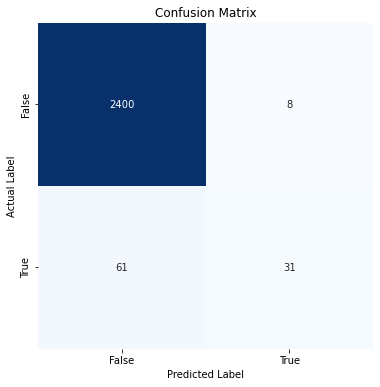

In [174]:
# 1. Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred_LogReg)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred_LogReg))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred_LogReg)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6,6))
sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

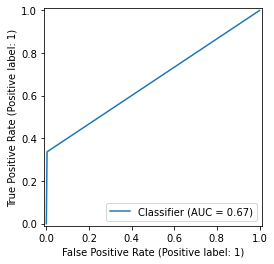

In [175]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(Y_test, pred_LogReg)
plt.show()

In [176]:
feature_names = X_train.columns

# Get the coefficients from the model
coefficients = model_LogReg.coef_[0]

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort the features by the absolute value of coefficients
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Feature Importances for Logistic Regression:")
print(feature_importance)

Feature Importances for Logistic Regression:
         Feature   Coefficient  Absolute Coefficient
0       Employed  5.198965e-01          5.198965e-01
1   Bank Balance  4.684461e-04          4.684461e-04
2  Annual Salary  3.885207e-07          3.885207e-07
